# Temas más relevantes en las reseñas
En este notebook se construye la solución de NLP para identificar cuáles son los temas más abordados, y por tanto los de mayor interés, para la comunidad.

Para este análisis solo se trabajará con el **dataset** de ratings ('books_rating.csv') el cual contiene todas las reseñas de los libros.

> **Disclaimer**

> Debido a que el laboratorio de AWS dejó de estar disponible, la base de datos donde se habpian cargado todos los datos a partir de los cuales se iba a trabajar también dejó de estar disponible. Por esta razón en este notebook se trabajará directamente con los dataset (CSV) originales.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Análisis de los datos y limpieza de los datos
Se identifican los dataset, se cargan en memoria, se entiende qué tipo de datos hay y con cuáles realmente vamos a trabajar. En definitiva, se construye un Data Frame de Pandas con toda la información base, a partir de la cual se realizará la selección de una muestra aleatoria para desarrollar todo el análisis.

In [2]:
path = '../../Datasets/books_rating.csv'
df = pd.read_csv(path)
print(df.columns)

Index(['Id', 'Title', 'Price', 'User_id', 'profileName', 'review/helpfulness',
       'review/score', 'review/time', 'review/summary', 'review/text'],
      dtype='object')


Se va a trabajar solamente con las columnas de reseñas y score. Se renombran a 'review' y 'score' para hacer más entendible. 

In [3]:
df = df[['review/text', 'review/score']]
colum_ranames = {
    "review/text": "review",
    "review/score": "score"
}
df = df.rename(columns = colum_ranames)

Revisión de nulos en el data frame:

In [4]:
df.isna().sum()

review    8
score     0
dtype: int64

Teniendo en cuenta que la cantidad de nulos es muy baja (casi despresible), se eliminan esos registros que contienen nulos.

In [5]:
df = df.dropna()
df.isna().sum()


review    0
score     0
dtype: int64

# Step 2: Selección de la muestra aleatoria
Teniendo el dataset con las columnas con las que se va a trabajar, se procede a elegir la muestra aleatoria (en principio el 10%). 

Se cara una muestra de los datos (en este caso trabajaremos con el 10% del total, lo que hace que estemos abordando 300.000 registros y un total de 286MB de información en memoria)

Para que la muestra aleatoria no haya que volver a computarla (lo que es computacionalmente costosa, dado a que hay que cargar todo el dataset original), se crea un nuevo CSV con la muestra seleccionada.

In [6]:

percent_sample = 0.1
num_filas_seleccion = int(len(df) * percent_sample)
df = df.sample(n=num_filas_seleccion)

path_new_df = path = '../../Datasets/books_rating_sample.csv'
df.to_csv(path_new_df)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299999 entries, 55619 to 2765719
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   review  299999 non-null  object 
 1   score   299999 non-null  float64
dtypes: float64(1), object(1)
memory usage: 6.9+ MB


# Step 3: Generar nuevas columnas con información de análisis
Para facilitar el análisis de las reseñas, en términos de "reseñas positivas" y "reseñas negativas", se genera una nueva columna para indicar justamente eso, paerrtiendo del valor del score.

- Positiva: score mayor o igual a 4
- Neutral: score igual a 3
- Negativa: score menor a 3

In [13]:
condiciones = [
    df['score'] >= 4,
    df['score'] == 3,
    df['score'] < 3
]
categorias = ['positiva', 'neutra', 'negativa']
df['category'] = np.select(condiciones, categorias)
agrupado = df.groupby('category').size().reset_index(name='count')
print(agrupado)

   category   count
0  negativa   35411
1    neutra   25419
2  positiva  239169


A continuación se analiza cómo se distribuyen las opiniones según su categoría (y el score)

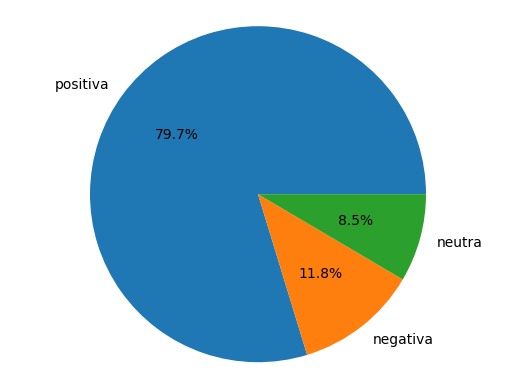

In [17]:
conteos = df['category'].value_counts()
valores = conteos.values
etiquetas = conteos.index
plt.pie(valores, labels = etiquetas, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

# Step 4: 